# Introduction

The rapid evolution of medical imaging technologies has brought about transformative changes in the healthcare landscape. Among its many applications, one of the most crucial is the identification and classification of brain tumors. This complex task is paramount for healthcare professionals to determine appropriate treatment strategies and ultimately influence patient outcomes. The Brain Tumor Classification project aspires to harness state-of-the-art technologies and machine learning techniques to elevate the accuracy and efficiency of brain tumor diagnosis.

Brain tumors, whether benign or malignant, necessitate accurate and timely identification for effective medical intervention. Magnetic resonance imaging (MRI) scans, offering detailed visualization of internal brain structures, have emerged as indispensable tools for detecting abnormalities. This project is centered around crafting a robust classification system that analyzes MRI images. The project aims to automate the classification process by employing advanced machine learning algorithms, reducing reliance on manual interpretation and potentially expediting the diagnostic timeline.

The primary objectives of the Brain Tumor Classification project encompass achieving enhanced diagnostic accuracy through machine learning models, expediting the diagnosis process for time efficiency, and providing insights into tumor characteristics for personalized treatment planning. The exploration and implementation of advanced technologies, such as deep learning and image analysis, are critical to ensuring precision and reliability in tumor classification. The project also emphasizes seamless integration with existing healthcare systems and addresses ethical considerations surrounding patient privacy, data security, and the responsible use of artificial intelligence in the medical domain. In essence, the project stands at the intersection of medical science and technological innovation, with a mission to contribute to advancing neuroimaging and enhancing patient outcomes in the challenging domain of brain tumor diagnosis and classification.

# Dataset

### About the Selected Brain Tumor Image Detection Dataset

**Data Source:**

Subset of RSNA-MICCAI Brain Tumor Radiogenomic Classification dataset 400 images from the RSNA-MICCAI Brain Tumor Radiogenomic Classification dataset JPGs exported at their native size and separated by plane (Axial, Coronal, and Sagittal) and made avaiable in Kaggle .

**Key Features and Enhancements:**
1. **Manual Annotation:**
Tumors are hand-labeled using https://makesense.ai and bounding box coordinates and MGMT positive labels
2. **Image Normalization and Resizing :**
Original image sizes included 512x512, 256x512, 448x512 all which were multiples of 32 and so were handled with Yolo libraries with stride size 32

**Dataset for demostration purposes** It is important to note that although the source dataset which was releaed by the by the Radiological Society of North America (RSNA) in partnership with the American Society of Neuroradiology (ASNR) and the Medical Image Computing and Computer Assisted Interventions (MICCAI) Society as part of a brain tumor detection and classification using multi-parametric magnetic resonance imaging (mpMRI) scans, the annotated dataset used in our project has not been peer reviewed and so its use case should be only incldued as a proof of concept for demonstration purposes only. To move this project from proof of concept to production, one would need to anotate this images by a qualified health profesional and have them peer reviewed which is beyond the scope of this program. 

**Availability:**
Researchers and practitioners can access this dataset on Kaggle, providing a valuable resource for developing, testing, and validating machine learning models in the critical field of brain tumor classification.


## Data Download

In [1]:
# import zipfile

# with zipfile.ZipFile('Brain_Tumors_256_by_256.zip', 'r') as zip_ref:
#     zip_ref.extractall('Brain_Tumors_256_by_256')

In [2]:
# import zipfile

# with zipfile.ZipFile('Brain_Tumor_400_Images.zip', 'r') as zip_ref:
#     zip_ref.extractall('Brain_Tumor_400_Images')

# Data Processing

## Preprocess the dataset

The Tumor detection dataset, initially consisting of labeled and unlabeled images and also consisting of only two segments, train and test was processed and organized into training, testing, and validation subsets with a ratio of 70:15:15 respectively

In [ ]:
import os
import shutil
import numpy as np

base_dir = 'Brain_Tumor_400_Images'
classes = ['axial_t1wce_2_class', 'coronal_t1wce_2_class', 'sagittal_t1wce_2_class']
subfolders = ['test', 'train', 'validation']

# Create new directories for images and labels with train, test and validation subfolders
new_image_dir = os.path.join(base_dir, 'images')
new_label_dir = os.path.join(base_dir, 'labels')

for folder in subfolders:
    os.makedirs(os.path.join(new_image_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(new_label_dir, folder), exist_ok=True)

# Function to move files with renaming to avoid conflicts
def move_files(src_dir_img, src_dir_lbl, dest_img_dir, dest_lbl_dir,class_prefix):
    files = os.listdir(src_dir_img)
    total_files = len(files)

    # creating indices for train:test:val => 70:15:15 distribution
    train_indices = np.arange(0,int(0.7*total_files))
    test_indices = np.arange(int(0.7*total_files),int(0.85*total_files))
    val_indices = np.arange(int(0.85*total_files),total_files)

    for i in np.arange(total_files):
        new_filename = f"{class_prefix}_{files[i]}"
        
        if i in train_indices:
            shutil.move(os.path.join(src_dir_img, files[i]), os.path.join(dest_img_dir, 'train', new_filename))
            if os.path.exists(os.path.join(src_dir_lbl, files[i].replace('.jpg', '.txt'))): # check if label file exists
                shutil.move(os.path.join(src_dir_lbl, files[i].replace('.jpg', '.txt')), os.path.join(dest_lbl_dir, 'train', new_filename.replace('.jpg', '.txt')))
        elif i in test_indices:
            shutil.move(os.path.join(src_dir_img, files[i]), os.path.join(dest_img_dir, 'test', new_filename))
            if os.path.exists(os.path.join(src_dir_lbl, files[i].replace('.jpg', '.txt'))): # check if label file exists
                shutil.move(os.path.join(src_dir_lbl, files[i].replace('.jpg', '.txt')), os.path.join(dest_lbl_dir, 'test', new_filename.replace('.jpg', '.txt')))
        elif i in val_indices:
            shutil.move(os.path.join(src_dir_img, files[i]), os.path.join(dest_img_dir, 'validation', new_filename))
            if os.path.exists(os.path.join(src_dir_lbl, files[i].replace('.jpg', '.txt'))): # check if label file exists
                shutil.move(os.path.join(src_dir_lbl, files[i].replace('.jpg', '.txt')), os.path.join(dest_lbl_dir, 'validation', new_filename.replace('.jpg', '.txt')))

# Move and rename files from each class
for class_name in classes:
    for subfolder in ['train','test']: # for each of the original train/test subfolders
        image_src = os.path.join(base_dir, class_name, 'images', subfolder)
        label_src = os.path.join(base_dir, class_name, 'labels', subfolder)
        
        move_files(image_src, label_src, new_image_dir, new_label_dir, class_name)

print("Files successfully moved and organized into train and test sets.")

In [48]:
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Directory paths
base_dir = 'Brain_Tumor_400_Images'
train_image_dir = os.path.join(base_dir,'images/train')
test_image_dir = os.path.join(base_dir,'images/test')
validation_image_dir = os.path.join(base_dir,'images/validation')

train_label_dir = os.path.join(base_dir,'labels/train')
test_label_dir = os.path.join(base_dir,'labels/test')
validation_label_dir = os.path.join(base_dir,'labels/validation')

dataset = [(train_image_dir,"Train ",train_label_dir),(test_image_dir,"Test ",test_label_dir),(validation_image_dir,"Validation ", validation_label_dir)]

### Visualize with a histogram with count distribution of images with different a) combination widthxheights and channels

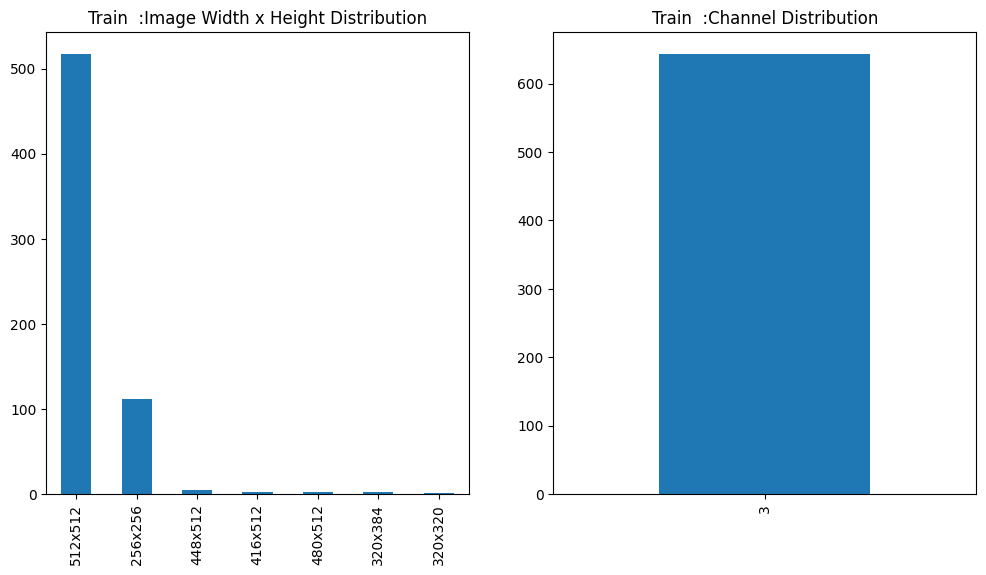

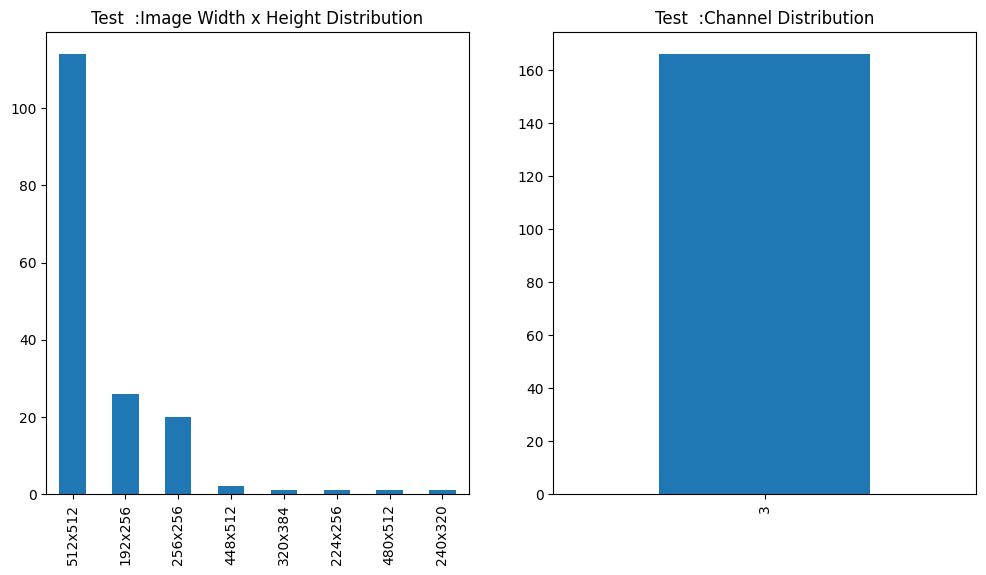

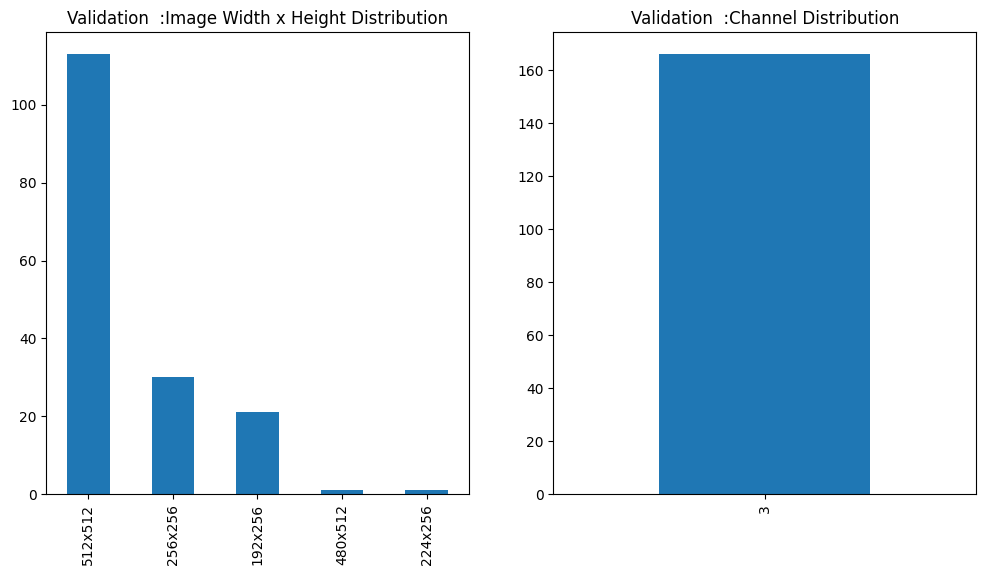

In [49]:
def visualize_histogram(image_directory, name):
    image_sizes = []
    channels_count = []
    for filename in os.listdir(image_directory):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(image_directory, filename)
            img = cv2.imread(image_path)
            height, width, channels = img.shape
            image_sizes.append((width,height))
            channels_count.append(channels)

    df_sizes = pd.DataFrame(image_sizes, columns=['Width','Height'])
    df_sizes['WidthxHeight'] = df_sizes['Width'].astype(str) + 'x' + df_sizes['Height'].astype(str)

    # Plotting histograms for width x height and channel distribution
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    df_sizes['WidthxHeight'].value_counts().plot(kind='bar')
    plt.title(name +' :Image Width x Height Distribution')

    plt.subplot(1,2,2)
    pd.Series(channels_count).value_counts().plot(kind='bar')
    plt.title(name +' :Channel Distribution')

for dir, name, _ in dataset:
    visualize_histogram(dir, name)

### Count all images that  have missing lables and widthxheights combination less  less than 256x256

In [50]:
def count_missing_labels(images_directory, labels_directory):
    image_files_set = {file.split('.')[0] for file in os.listdir(images_directory)}
    label_files_set = {file.split('.')[0] for file in os.listdir(labels_directory)}
    missing_labels = image_files_set.difference(label_files_set)
    return len(missing_labels), len(image_files_set)

def count_small_images(image_directory, threshold=(256,256)):
    count = 0
    for filename in os.listdir(image_directory):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(image_directory, filename)
            img = cv2.imread(image_path)
            height, width, _ = img.shape
            if width < threshold[0] or height < threshold[1]:
                count += 1
    return count

for images_dir, name, labels_dir in dataset:
    missing_count,total_count=count_missing_labels(images_dir, labels_dir)
    print(f"Total {name} images: {total_count}, {name} Images without labels: {missing_count}")

for images_dir, name, labels_dir in dataset:
    small_img_count=count_small_images(images_dir)
    print(f"{name} Images with size less than 256x256: {small_img_count}")

Total Train  images: 644, Train  Images without labels: 1
Total Test  images: 166, Test  Images without labels: 0
Total Validation  images: 166, Validation  Images without labels: 0
Train  Images with size less than 256x256: 0
Test  Images with size less than 256x256: 28
Validation  Images with size less than 256x256: 22


### Delete images that have missing lables

In [ ]:
def delete_no_label_images(images_directory, labels_directory):
    image_files_set = {file.split('.')[0] for file in os.listdir(images_directory)}
    label_files_set = {file.split('.')[0] for file in os.listdir(labels_directory)}
    no_label_images = image_files_set.difference(label_files_set)

    for file in no_label_images:
        print(os.path.join(images_directory, file+".jpg"))
        os.remove(os.path.join(images_directory, file+".jpg"))
for images_dir, name, labels_dir in dataset:
    delete_no_label_images(images_dir, labels_dir)

### Delete images with dimentions less than 256x256

In [ ]:
def delete_small_images(image_directory, threshold=(256,256)):
    for filename in os.listdir(image_directory):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(image_directory, filename)
            img = cv2.imread(image_path)
            height, width, _ = img.shape
            if width < threshold[0] or height < threshold[1]:
                os.remove(image_path)

delete_small_images(train_image_dir)

### Verify the distribution of the datasets

In [ ]:
for images_dir, name, labels_dir in dataset:
    missing_count,total_count=count_missing_labels(images_dir, labels_dir)
    print(f"Total {name} images: {total_count}, {name} Images without labels: {missing_count}")

for images_dir, name, labels_dir in dataset:
    small_img_count=count_small_images(images_dir)
    print(f"{name} Images with size less than 256x256: {small_img_count}")

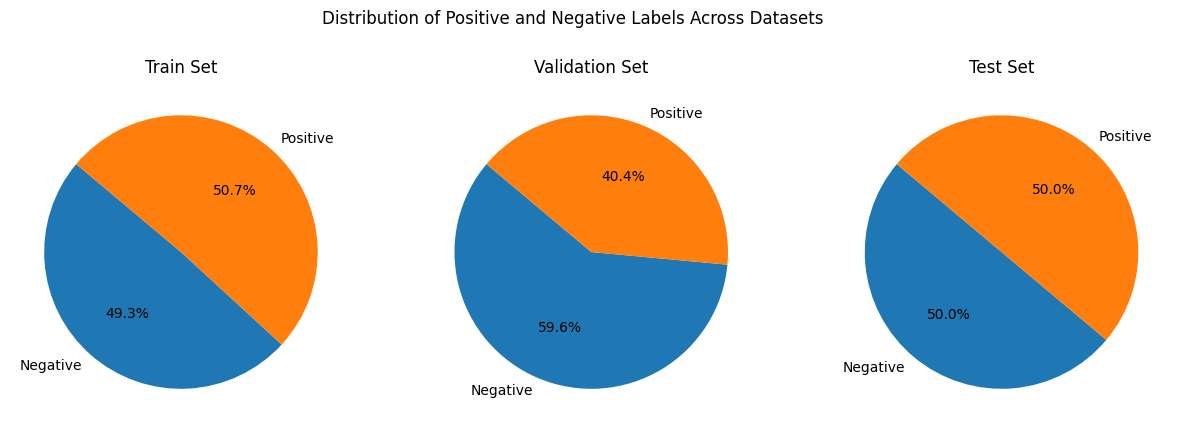

In [52]:
import os
import matplotlib.pyplot as plt

def count_labels(directory):
    positive_count = 0
    negative_count = 0

    # Traverse through all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as file:
                line = file.readline()
                label = line.split(' ')[0]
                if label == '1':
                    positive_count += 1
                elif label == '0':
                    negative_count += 1

    return positive_count, negative_count


base_dir = 'Brain_Tumor_400_Images'

# Directories to traverse
dirs = ['train', 'validation', 'test']
data = {'train': [], 'validation': [], 'test': []}

# Count labels in each directory
for dir in dirs:
    pos, neg = count_labels(os.path.join(base_dir, 'labels', dir))
    data[dir] = [neg, pos]

# Plotting as pie charts
fig, axs = plt.subplots(1, len(dirs), figsize=(15, 5))

for i, dir in enumerate(dirs):
    axs[i].pie(data[dir], labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'{dir.capitalize()} Set')

plt.suptitle('Distribution of Positive and Negative Labels Across Datasets')
plt.show()


# Detection 

## Random Print images from the Kaggle Dataset

The image axial_t1wce_2_class_00130_78.jpg is 256 pixels wide and 256 pixels high.
The image axial_t1wce_2_class_00111_110.jpg is 256 pixels wide and 256 pixels high.
The image sagittal_t1wce_2_class_00077_166.jpg is 512 pixels wide and 512 pixels high.
The image coronal_t1wce_2_class_88 (3).jpg is 512 pixels wide and 512 pixels high.
The image coronal_t1wce_2_class_74 (10).jpg is 512 pixels wide and 512 pixels high.
The image coronal_t1wce_2_class_74 (11).jpg is 512 pixels wide and 512 pixels high.
The image coronal_t1wce_2_class_87 (4).jpg is 512 pixels wide and 512 pixels high.
The image axial_t1wce_2_class_00130_100.jpg is 256 pixels wide and 256 pixels high.
The image axial_t1wce_2_class_00053_263.jpg is 512 pixels wide and 512 pixels high.


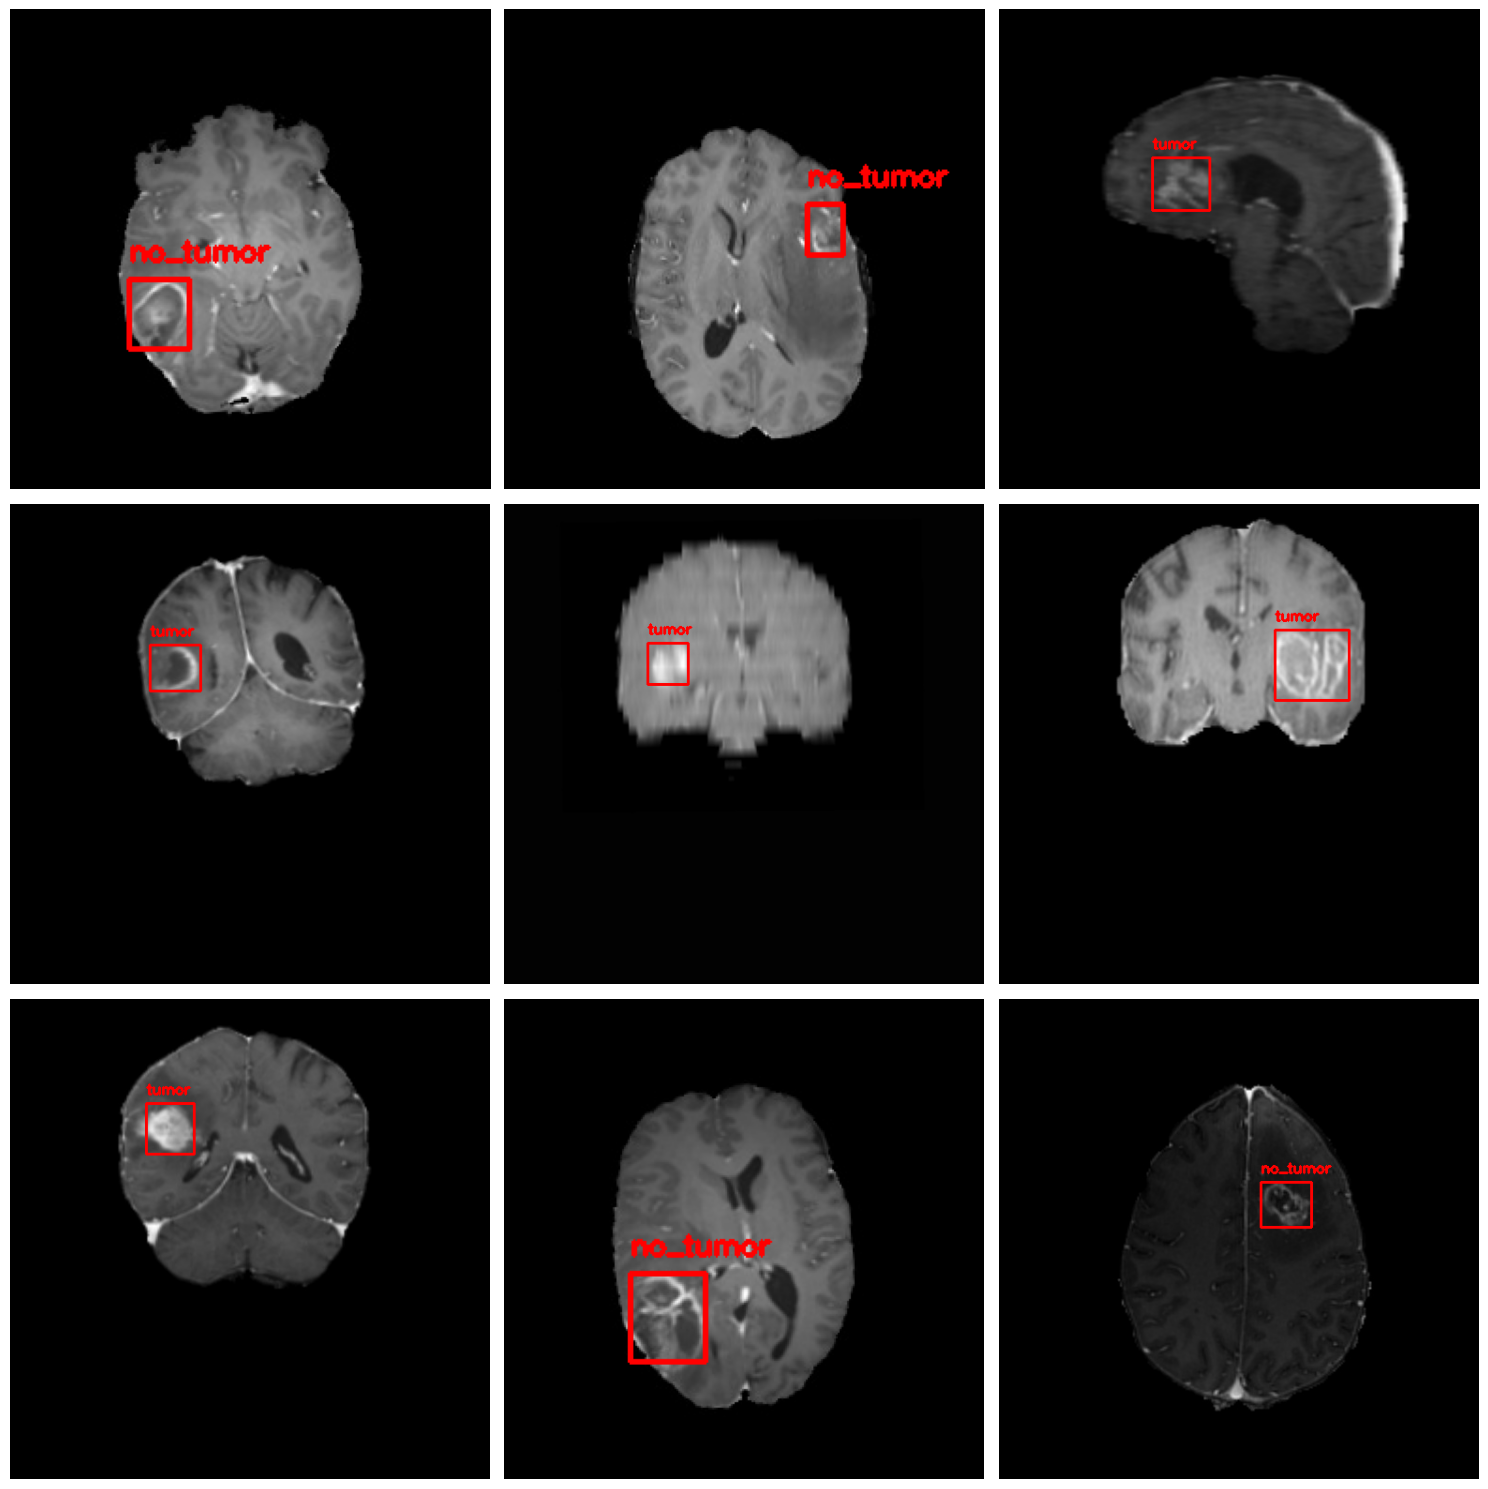

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
import random

def draw_bounding_box(img, labels, class_name):
    """
    Function to draw bounding box and add class name on the image.
    """
    for label in labels:
        # Parse label
        class_id, x_center, y_center, width, height = map(float, label.split())

        # Convert to pixel coordinates
        x_center = x_center * img.shape[1]
        y_center = y_center * img.shape[0]
        width = width * img.shape[1]
        height = height * img.shape[0]
        
        # Calculate minimum pixel coordinates
        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)

        # Determine class name based on class_id
        class_name = "tumor" if class_id == 1 else "no_tumor"

        # Draw bounding box and add class name
        cv2.rectangle(img, (x_min, y_min), (int(x_min + width), int(y_min + height)), (255, 0, 0), 2)
        cv2.putText(img, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return img

# Directory paths
base_dir = 'Brain_Tumor_400_Images'
image_dir = os.path.join(base_dir,'images/train')
label_dir = os.path.join(base_dir,'labels/train')

# Get random image files
image_files = os.listdir(image_dir)
random_images = random.sample(image_files, 9)

# Set up plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i, img_file in enumerate(random_images):
    # Paths for image and label
    image_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace('.jpg', '.txt'))

    try:
        # Load image and labels
        img = cv2.imread(image_path)
        if img is None:
            print(f"Image not loaded properly: {img_file}")
            continue
        
        # Get the dimensions of the image and print them
        height, width, _ = img.shape
        print(f"The image {img_file} is {width} pixels wide and {height} pixels high.")
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        try:
            with open(label_path, 'r') as f:
                labels = f.readlines()
                
        except Exception as e:
            print(f"Error reading label file: {label_path}")
            continue
        
        # Draw bounding box
        if labels:
            img_with_boxes = draw_bounding_box(img, labels, "")

           # Display the image
            axes[i].imshow(img_with_boxes)
            axes[i].axis('off')
       
        else:
            print(f"No label found for: {img_file}")
    
    except Exception as e:
       print(f"Error loading image or drawing bounding box for: {img_file}")
       continue

plt.tight_layout()
plt.show()


# Training YOLO v8 for Tumor Detection
Developed by Ultralytics, YOLOv8 represents an advancement in state-of-the-art object detection and image segmentation models, released on January 10, 2023. It demonstrates superior speed and accuracy over other single-stage detectors like MobileNetSSDv2, primarily due to its ability to handle both object identification and classification in a single network pass. One of the key aspects of how YOLO operates is through image resizing which allows it to detect objects at different scales effectively.


In [9]:
from ultralytics import YOLO
#!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8l-oiv7.pt .
#!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x-oiv7.pt .
#!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8m-oiv7.pt .

### Choice of YOLOv8m Medium trained on Open Image v7

We decided to employ the YOLOv8m medium checkpoints trained on Open Image V7 for our project. We made this choice based on several factors. Firstly, Open Image V7 has a larger number of pre-trained classes (600) compared to COCO's 80 pre-trained classes, providing a wider scope for detection and classification tasks in our data set. Secondly, comparing the performance metrics of YOLOv8m between both models, we observed that although there were differences in mAPval values and speed parameters between both versions, we expected that the benefits from using a more diverse dataset (Open Image V7), would outweigh any potential disadvantages. The dataset was trained on the medium checkpoint with 26.2M parameters for 20 epochs

In [23]:
model = YOLO('yolov8x-oiv7.pt')  # load a pretrained model (recommended for training)

results = model.train(data='combined.yaml', epochs=30, imgsz=640) 

New https://pypi.org/project/ultralytics/8.0.225 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.221 🚀 Python-3.9.18 torch-2.1.1+cu121 CUDA:0 (NVIDIA L4, 22488MiB)
engine/trainer: task=detect, mode=train, model=yolov8x-oiv7.pt, data=combined.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train44, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, sa

train: Scanning /home/jupyter/msaai-all/Vision/module7/Brain_Tumor_400_Images/labels/train.cache... 643 images, 0 backgrounds, 0 corrupt: 100%|██████████| 643/643 [00:00<?, ?it/s]
val: Scanning /home/jupyter/msaai-all/Vision/module7/Brain_Tumor_400_Images/labels/validation.cache... 166 images, 0 backgrounds, 0 corrupt: 100%|██████████| 166/166 [00:00<?, ?it/s]


Plotting labels to runs/detect/train44/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train44
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      13.1G      1.458      4.002      1.526          4        640: 100%|██████████| 41/41 [00:28<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all        166        176          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      13.6G      1.363      1.811       1.52          7        640: 100%|██████████| 41/41 [00:27<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        166        176          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      13.6G      1.413      1.856      1.583          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        166        176          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      13.6G      1.446      1.667      1.571          4        640: 100%|██████████| 41/41 [00:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        166        176    0.00437    0.00472   0.000117   4.99e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      13.6G       1.36      1.589      1.539          4        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        166        176      0.109     0.0284     0.0139    0.00662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      13.6G      1.341      1.535      1.529          2        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        166        176      0.109     0.0284     0.0139    0.00662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      13.6G      1.318      1.504      1.495          4        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.447      0.569      0.386      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      13.6G      1.219      1.409      1.419          6        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.445      0.656       0.44      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      13.6G        1.2      1.356      1.417          5        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        166        176       0.42      0.521      0.346      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      13.6G      1.219      1.364      1.412          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        166        176      0.433      0.708       0.44      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      13.6G      1.207      1.386      1.417          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.423      0.706      0.473      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      13.6G      1.176      1.317      1.386          5        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.448       0.82      0.481      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      13.6G      1.195      1.322      1.396          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.428      0.775      0.476      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      13.6G      1.077      1.233      1.303          2        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.454      0.783      0.497      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      13.6G      1.105      1.239      1.336          4        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.421      0.798      0.503      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      13.6G      1.084      1.255      1.309         12        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.451      0.768      0.495      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      13.6G      1.101       1.22      1.329          6        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.447      0.793      0.489       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      13.6G      1.099      1.186      1.318          5        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        166        176      0.463      0.767      0.497      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      13.6G       1.11      1.213      1.321          4        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.478      0.755      0.511      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      13.5G      1.033      1.149      1.267          6        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.453      0.784      0.475      0.339


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      13.6G      1.022        1.2      1.359          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.463      0.876      0.513      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      13.6G     0.9933      1.138      1.361          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.479      0.891      0.505      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      13.6G       1.01      1.147      1.352          4        640: 100%|██████████| 41/41 [00:27<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        166        176      0.485      0.818      0.525      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      13.6G      0.983      1.095      1.319          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all        166        176      0.451      0.872      0.513      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      13.6G     0.9106       1.06       1.27          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.445      0.882      0.506      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      13.6G      0.899      1.061      1.264          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.449      0.831      0.492       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      13.6G     0.9071      1.046      1.267          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        166        176      0.465      0.862       0.52      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      13.5G     0.8819      1.035      1.276          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.461      0.869      0.503      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      13.6G     0.8295      1.004      1.215          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        166        176      0.467      0.888      0.521      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      13.6G      0.828      0.983      1.217          3        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        166        176      0.458       0.91      0.517      0.391



30 epochs completed in 0.356 hours.
Optimizer stripped from runs/detect/train44/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train44/weights/best.pt, 136.7MB

Validating runs/detect/train44/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.9.18 torch-2.1.1+cu121 CUDA:0 (NVIDIA L4, 22488MiB)
YOLOv8x summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]


                   all        166        176      0.465      0.887      0.519      0.398
              positive        166        106      0.565       0.93       0.64      0.483
              negative        166         70      0.366      0.843      0.399      0.314
Speed: 0.2ms preprocess, 13.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train44


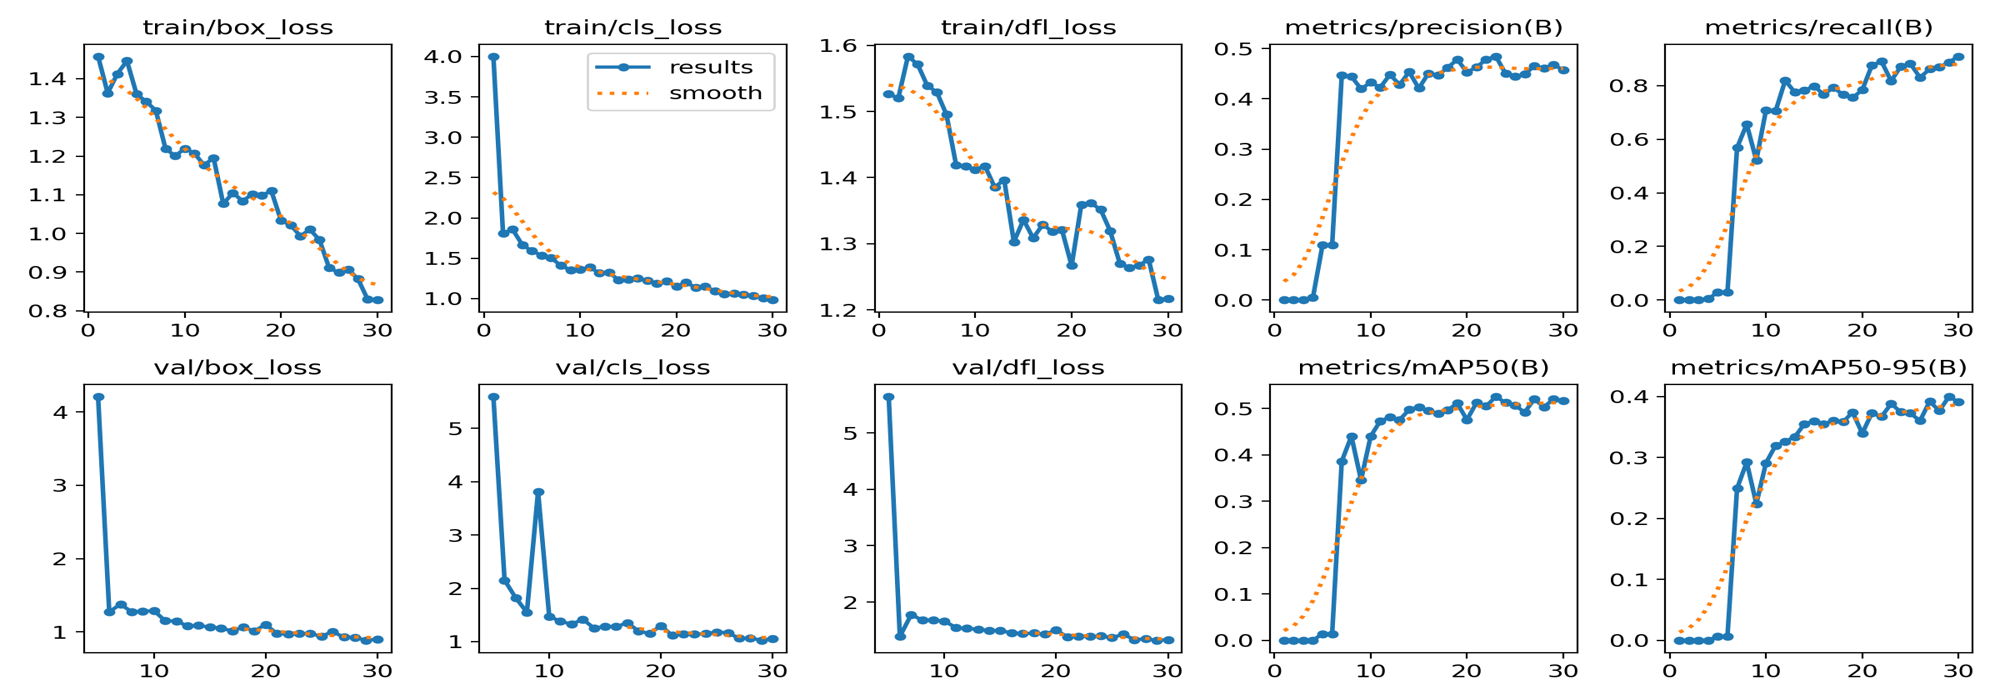

In [31]:
run = "44"
from PIL import Image
from IPython.display import display
width=2000
height=int(width*.35)

# Open the image file
img = Image.open(f'runs/detect/train{run}/results.png')

# Convert the image to RGB mode
img_rgb = img.convert("RGB")

# Specify the new size
new_size = (width, int(height))  # Replace 'width' and 'height' with desired values

# Resize the image
resized_img = img_rgb.resize(new_size)

# Display the resized image in the notebook
display(resized_img)

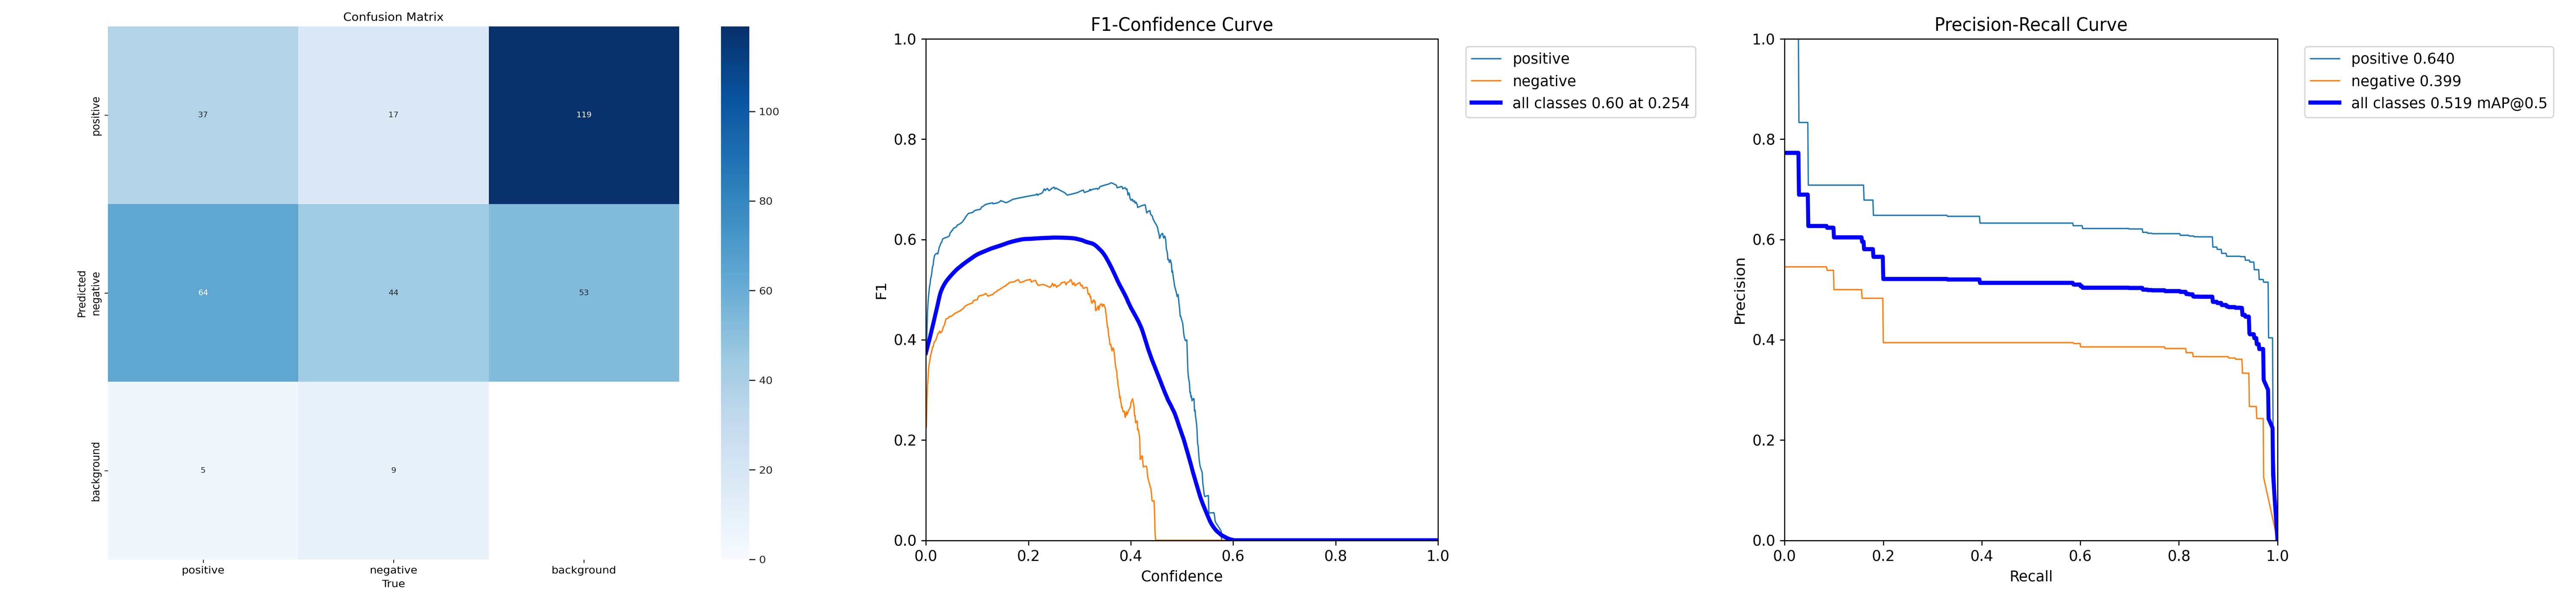

In [25]:
from PIL import Image
from IPython.display import display, HTML

def display_images_side_by_side(run, filenames, width=2000):
    height = int(width * 0.7)
    images = []

    # Load and resize each image
    for filename in filenames:
        img = Image.open(f'runs/detect/train{run}/{filename}').convert("RGB")
        resized_img = img.resize((width, height))
        images.append(resized_img)

    # Create a new blank image with enough width to contain all the images
    total_width = width * len(images)
    combined_img = Image.new('RGB', (total_width, height))

    # Paste each image into the combined image
    x_offset = 0
    for img in images:
        combined_img.paste(img, (x_offset, 0))
        x_offset += width

    # Display the combined image
    display(combined_img)


filenames = ["confusion_matrix.png", "F1_curve.png", "PR_curve.png"]
display_images_side_by_side(run, filenames)


**Results**

Based on the confusion matrix, the accuracy of the model is approximately 23.28%. This means that about 23.28% of all predictions made by the model are correct. The relatively low accuracy suggests that the model might be struggling to correctly classify instances, especially considering the high number of misclassifications involving the background class. It might be beneficial to review the model's parameters, the data it was trained on, or consider other modeling approaches to improve performance.

## Testing the model with the 256x256 Tumor Classification dataset


image 1/1 /home/jupyter/msaai-all/Vision/module7/Brain_Tumor_400_Images/images/validation/axial_t1wce_2_class_00352_93.jpg: 640x480 1 positive, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict31
1 label saved to runs/detect/predict31/labels

image 1/1 /home/jupyter/msaai-all/Vision/module7/Brain_Tumor_400_Images/images/validation/axial_t1wce_2_class_00095_176.jpg: 640x640 1 positive, 1 negative, 16.5ms
Speed: 2.4ms preprocess, 16.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict31
2 labels saved to runs/detect/predict31/labels

image 1/1 /home/jupyter/msaai-all/Vision/module7/Brain_Tumor_400_Images/images/validation/coronal_t1wce_2_class_44.jpg: 640x640 1 positive, 14.8ms
Speed: 2.6ms preprocess, 14.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict31
3 labels saved to runs/detect/pred

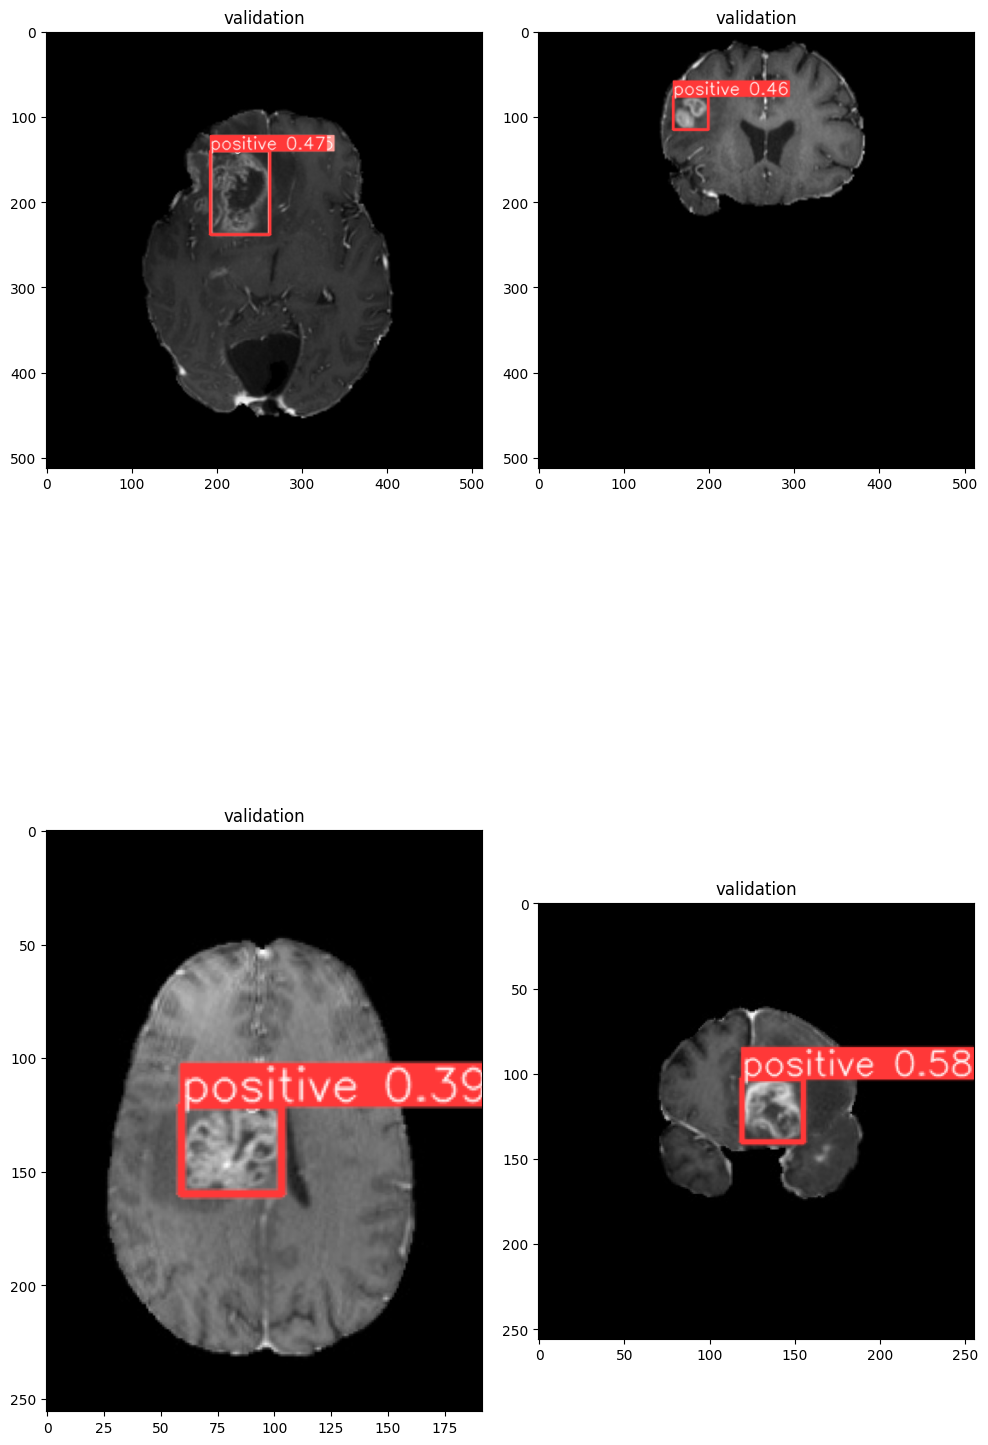

In [29]:
model = YOLO(f'runs/detect/train{run}/weights/best.pt')

import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

validation_base_dir = 'Brain_Tumor_400_Images/images'
validation_classes = ['validation']

def predict_random_samples(model, validation_base_dir, classes, img_height):
    # Adjust the figure size based on the desired height for each image
    fig_width = 10  # you can change this as needed
    fig_height = img_height * 2  # 2 rows of images
    fig, axs = plt.subplots(2, 2, figsize=(fig_width, fig_height))

    for i in range(2):
        for j in range(2):
            # Randomly select class
            selected_class = random.choice(classes)

            # Get list of all image files for selected class
            image_files = os.listdir(os.path.join(validation_base_dir, selected_class))

            # Randomly select two image files
            selected_images = random.sample(image_files, 2)

            for img_file in selected_images:
                img_path = os.path.join(validation_base_dir, selected_class, img_file)

                # Run prediction on each image and plot results
                result = model(img_path, save_txt=True, save_conf=True)
                
                for r in result:
                    im_array = r.plot()  # plot a BGR numpy array of predictions
                    im = Image.fromarray(im_array[..., ::-1])  # Convert to RGB PIL image
                    axs[i, j].imshow(np.array(im))
                    axs[i, j].set_title(selected_class)  # add title to plot
    plt.tight_layout()
    plt.show()

# Example usage
img_height = 10  # Set the desired height for each image
predict_random_samples(model, validation_base_dir, validation_classes, img_height)

# Conclusion

In conclusion, our project demonstrated the feasibility of constructing a two-stage machine learning pipeline for brain tumor analysis. We successfully tested the pipeline on a classification dataset comprising glioma, meningioma, normal, and pituitary tumor images. The results, while limited by the lack of medical review and peer-reviewed annotations, highlight the potential of this approach in assisting medical professionals by classifying and localizing brain tumors. However, for clinical application, a dataset annotated by healthcare professionals and subjected to peer review is essential. Our work serves primarily as a proof of concept, underscoring the need for rigorous validation before deployment in a medical setting.

# References

- RSNA-MICCAI Brain Tumor Radiogenomic Classification (2021). RSNA. Retrieved from https://www.rsna.org/rsnai/ai-image-challenge/brain-tumor-ai-challenge-2021

- Roberts, D. (Dec, 2022.). Brain Tumor Object Detection Datasets. Kaggle. Retrieved from https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets

- Terven, J. R., & Cordova-Esparaza, D. M. (2023). A Comprehensive Review of YOLO: From YOLOv1 to YOLOv8 and Beyond. arXiv. Retrieved from https://arxiv.org/pdf/2304.00501.pdf